# Tarea 7

__Alumno:__ Eduardo Carrasco

__Curso:__ Aprendizaje Automático 2022 

__Programa:__ Doctorado en Ingeniería de Sistemas Complejos

__Profesor:__ Gonzalo A. Ruz

__Ayudante:__ Carlos Sepúlveda

**Tema**: Clustering

## Instrucciones
* La actividad es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea7_Toledo_Mirosevic.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 02 de diciembre, 23:55 hrs.

El conjunto de datos que utilizará es el conjunto de datos del telescopio MAGIC Gamma. Los datos se generan para simular el registro de partículas gamma de alta energía en un telescopio gamma Cherenkov atmosférico basado en la tierra. Para obtener detalles completos sobre la descripción del conjunto de datos, consulte este [enlace](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope).

__Descripcion__:

| **Name**             | **Data Type** | **Measurement**    | **Description** |
|:----------------------:|:---------------:|:--------------------:|-----------------|
|fLength|continuous|[mm]|Major axis of ellipse|
|fWidth|continuous|[mm]|Minor axis of ellipse|
|fSize|continuous|[in #phot]|10-log of sum of content of all pixels|
|fConc|continuous|[ratio]|Ratio of sum of two highest pixels over fSize|
|fConc1|continuous|[ratio]|Ratio of highest pixel over fSize|
|fAsym|continuous|[mm]|Distance from highest pixel to center, projected onto major axis|
|fM3Long|continuous|[mm]|3rd root of third moment along major axis|
|fM3Trans|continuous |[mm]|3rd root of third moment along minor axis|
|fAlpha|continuous|[deg]|Angle of major axis with vector to origin|
|fDist|continuous|[mm]|Distance from origin to center of ellipse|
|class|discrete|[g , h]|gamma (signal), hadron (background)|

In [1]:
### Conocer version de paquetes y Hardware en uso
#------------------------------------------------------
#------------------------------------------------------
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

print(f"Plataforma (Software-Hardware): {platform.platform()}")
print(f"Versión de Python {sys.version}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Versión de Keras: {tensorflow.keras.__version__}")
print(f"versión de Pandas {pd.__version__}")
print(f"Versión de Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU está", "Disponible" if gpu else "No Disponible")
#---------------------------------------------------------

Plataforma (Software-Hardware): macOS-13.0.1-arm64-i386-64bit
Versión de Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
Versión de TensorFlow: 2.10.0
Versión de Keras: 2.10.0
versión de Pandas 1.5.1
Versión de Scikit-Learn 1.1.3
GPU está Disponible


## 1. Exploratory Data Analisis (EDA):

In [1]:
import pandas as pd
telescope_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',header=None)
telescope_data.columns = ['fLength', 'fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
telescope_data.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [2]:
telescope_data.describe(include='all')

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12332
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,NaN
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,NaN
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,NaN
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,NaN


Un análisis preliminar se puede efectuar con la tabla anterior, donde se observa que no hay datos perdidos. Todos tienen a lo menos 19020 registros y existen 2 clases de la variable de salida `class`.

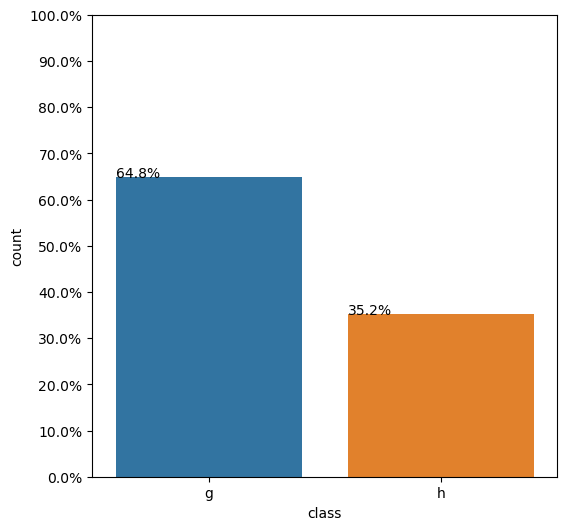

In [3]:
import numpy as np
import seaborn as sns
import matplotlib as plt 
from matplotlib.pyplot import figure
figure(figsize=(6,6))
total=len(telescope_data['class'])
plot=sns.countplot(x=telescope_data['class'],data=telescope_data)

for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.pyplot.show()

El análisis del gráfico anterior, demuestra que existe una tendencia mayor de clasificación de un telescopio como Gamma **g** de la variable `class`.

In [4]:
telescope_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConcl    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Se puede obtener un análisis preliminar donde todas las variables (_features_) independientes, corresponden a valores numéricos.

Demos de baja la variable clase, objeto sea asumido como un problema de aprendizaje no supervisado.

In [5]:
# Se elimina la variable discreta (objetivo)
X=telescope_data.drop(columns ='class',axis=1)

In [6]:
X.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


Efectuada la eliminación de la variable `class`, se debe efectuar un estandarizado de los valores.

In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data so that they have mean 0 and variance 1
X_std = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

#shows the first 5 rows of the table
X_std.head(8)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427
5,-0.038386,-0.056186,0.176651,-0.756678,-0.729877,0.932494,0.640077,0.459251,-0.920690,0.592534
6,-0.118105,-0.262977,0.440519,-0.697053,-0.571517,0.217969,0.540212,0.496333,-0.875523,0.338138
7,-0.624601,-0.459046,-0.577497,0.236712,0.024821,0.573700,0.194327,-0.152636,-1.027996,0.579634


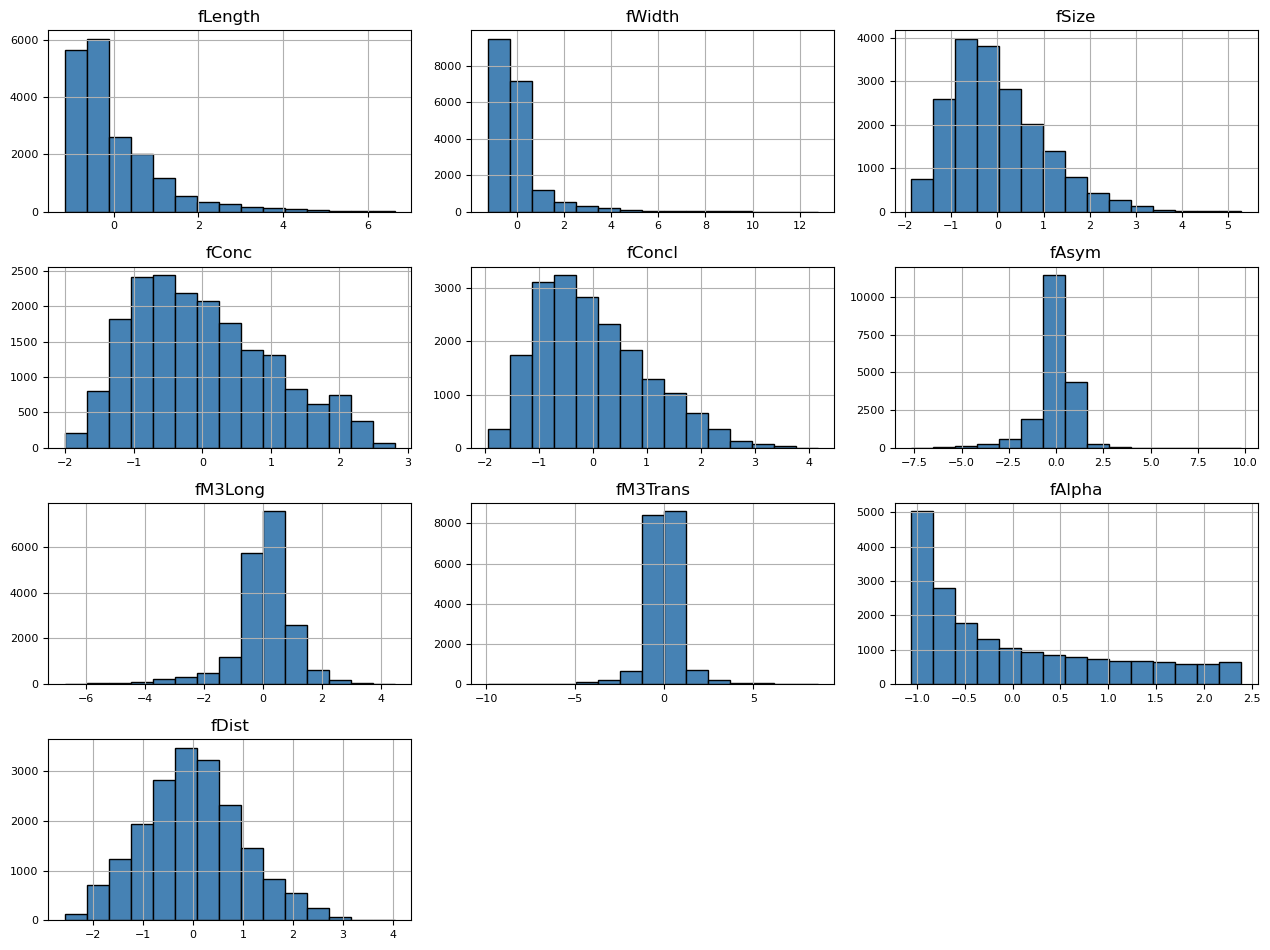

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

X_std.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=True)
plt.tight_layout(rect=(0, 0, 2, 2)) 

El gráfico de cada variable demuestra que la estandarización de los datos elimina la media y escala los datos de forma que su varianza sea igual a 1

## __Pregunta 1__: 
Aplique k-means, probando desde k = 1 hasta k = 20. Use la Silhouette Score para determinar la cantidad de grupos en los datos. Utilice el valor k* encontrado para ejecutar k*-means y mostrar los grupos resultantes mediante PCA. (__1.5 pts.__)

### A. Aplicación K-MEANS desde k=2 a k=20 - Silhouette Score.


Para n_clusters = 2  - El promedio silhouette_score es : 0.29390070875172525
Para n_clusters = 3  - El promedio silhouette_score es : 0.2698631551826389
Para n_clusters = 4  - El promedio silhouette_score es : 0.20307696862413982
Para n_clusters = 5  - El promedio silhouette_score es : 0.20757534376431092
Para n_clusters = 6  - El promedio silhouette_score es : 0.2019589963220549
Para n_clusters = 7  - El promedio silhouette_score es : 0.2032025660363876
Para n_clusters = 8  - El promedio silhouette_score es : 0.16729657700220307
Para n_clusters = 9  - El promedio silhouette_score es : 0.17158239088958907
Para n_clusters = 10  - El promedio silhouette_score es : 0.16866588474672922
Para n_clusters = 11  - El promedio silhouette_score es : 0.17392651135475232
Para n_clusters = 12  - El promedio silhouette_score es : 0.17294998437549394
Para n_clusters = 13  - El promedio silhouette_score es : 0.16367047133796853
Para n_clusters = 14  - El promedio silhouette_score es : 0.154100648672414

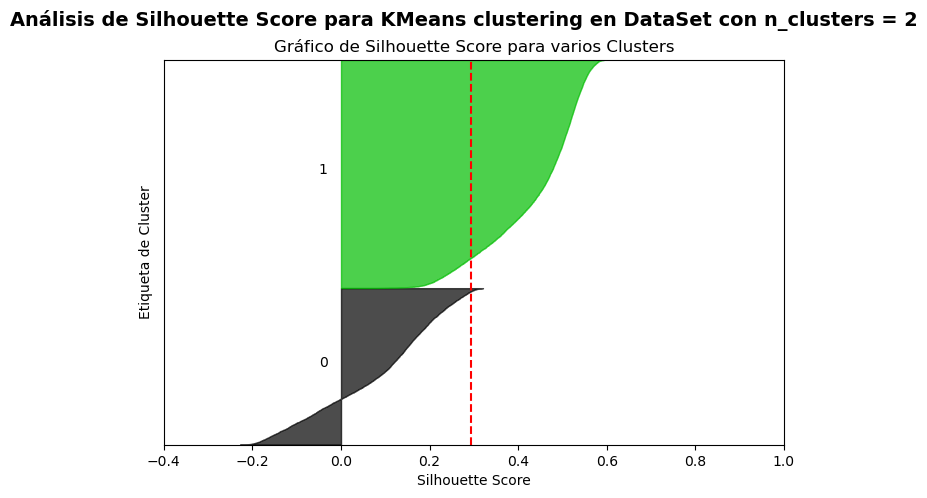

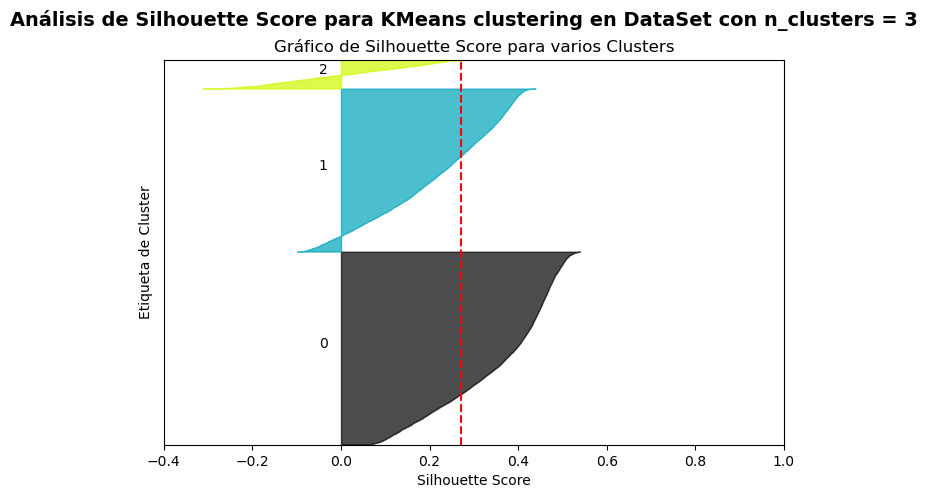

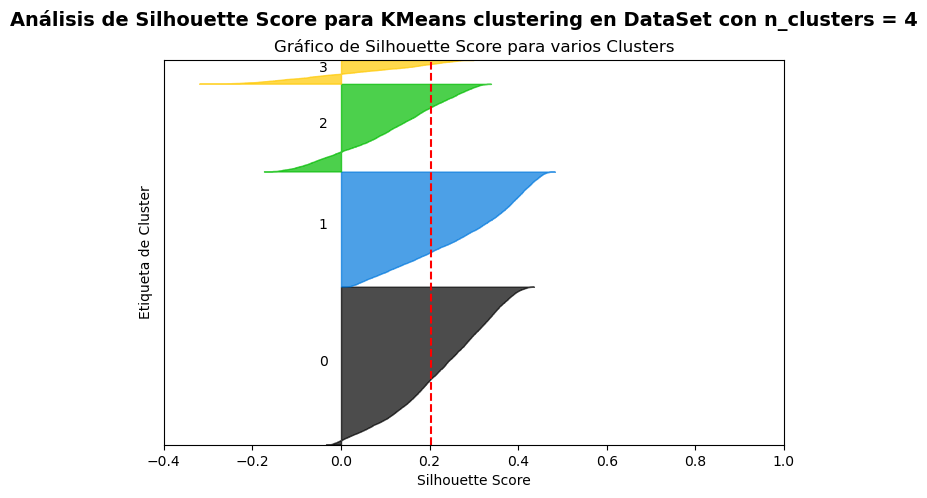

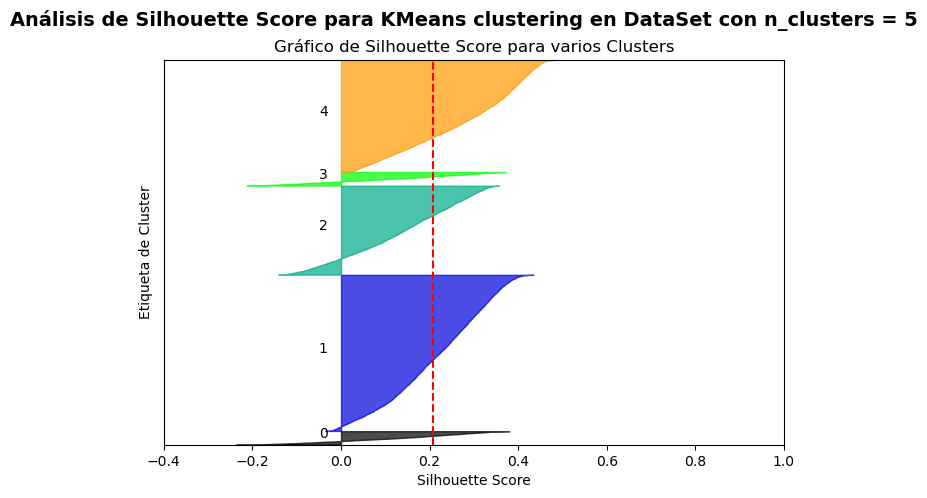

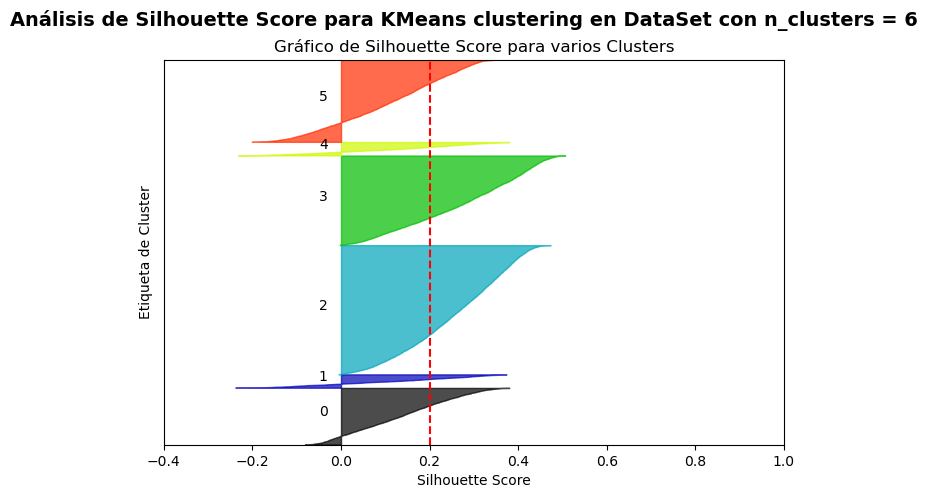

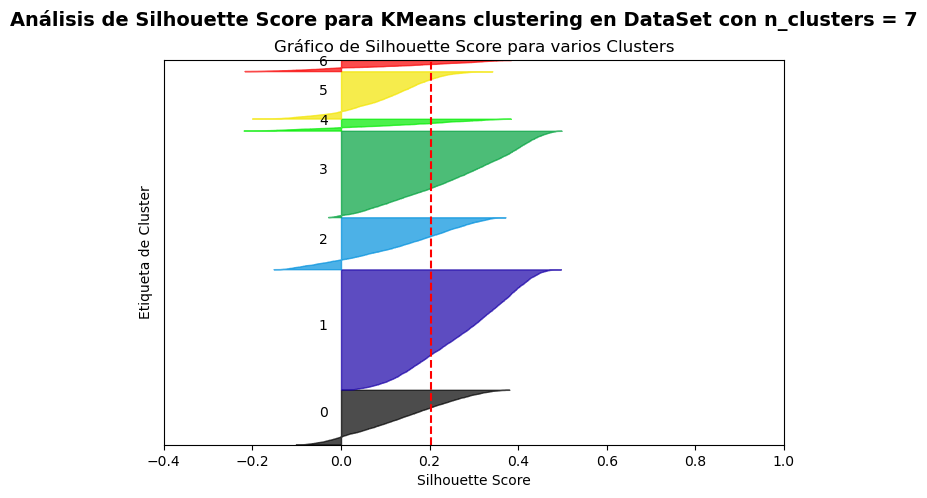

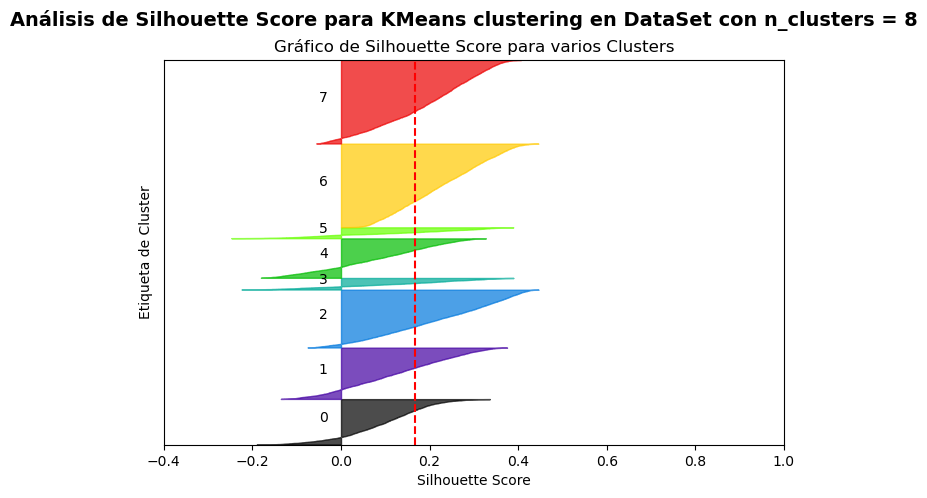

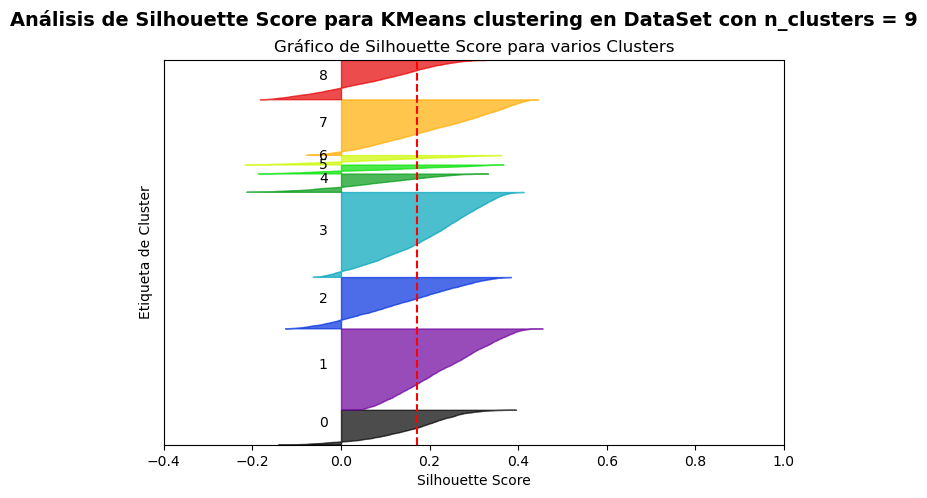

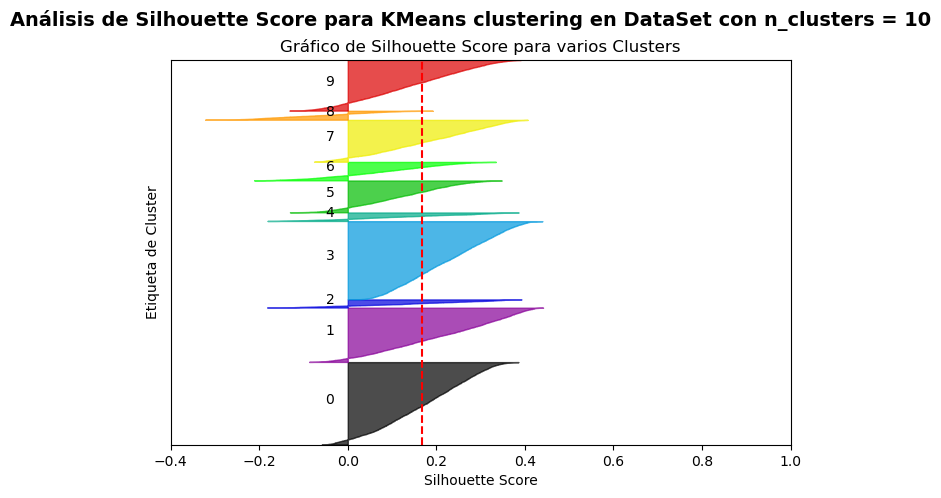

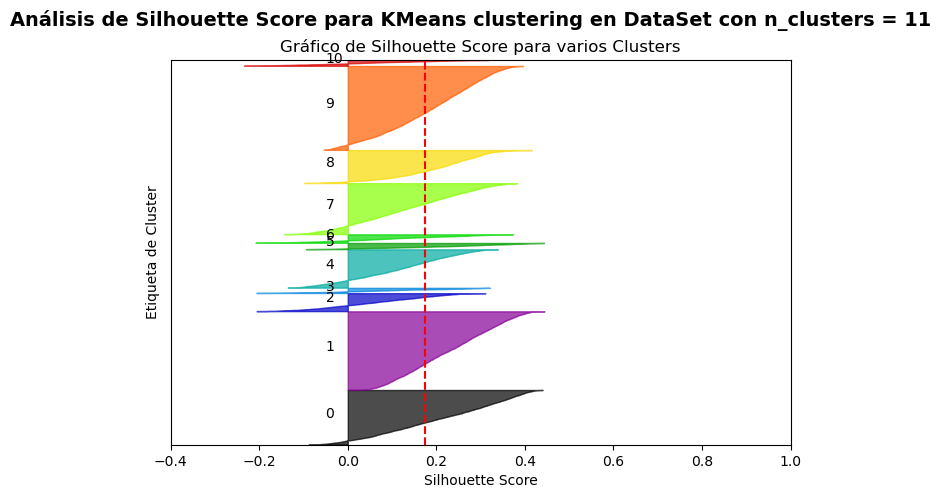

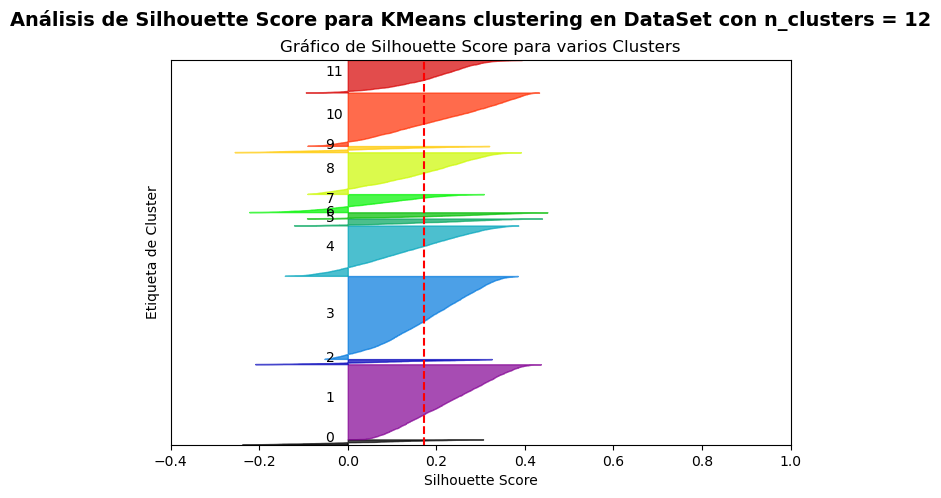

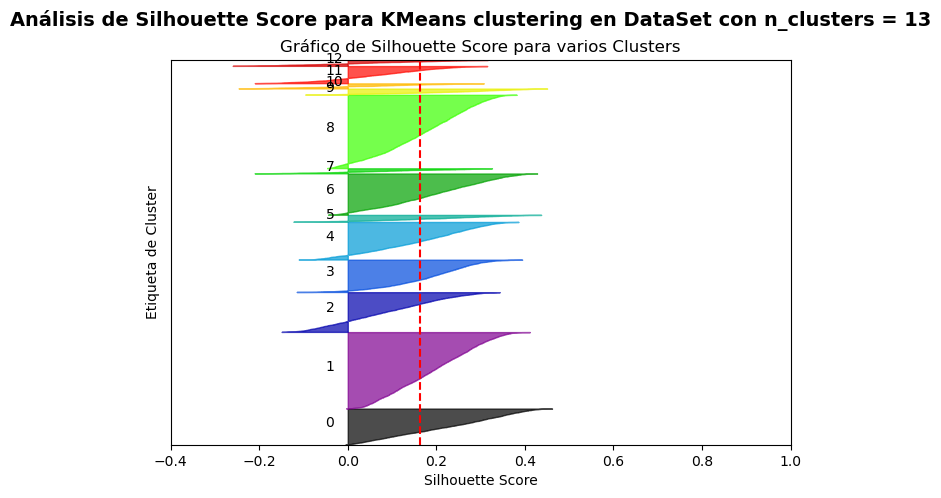

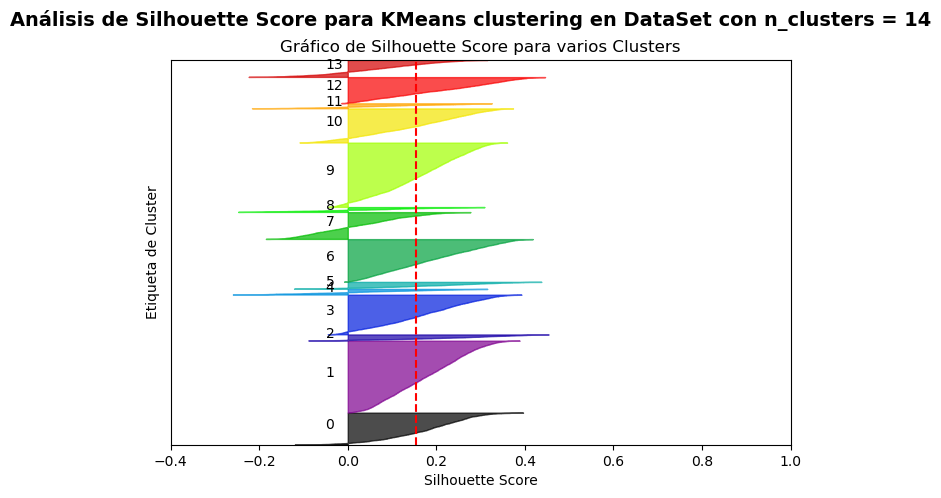

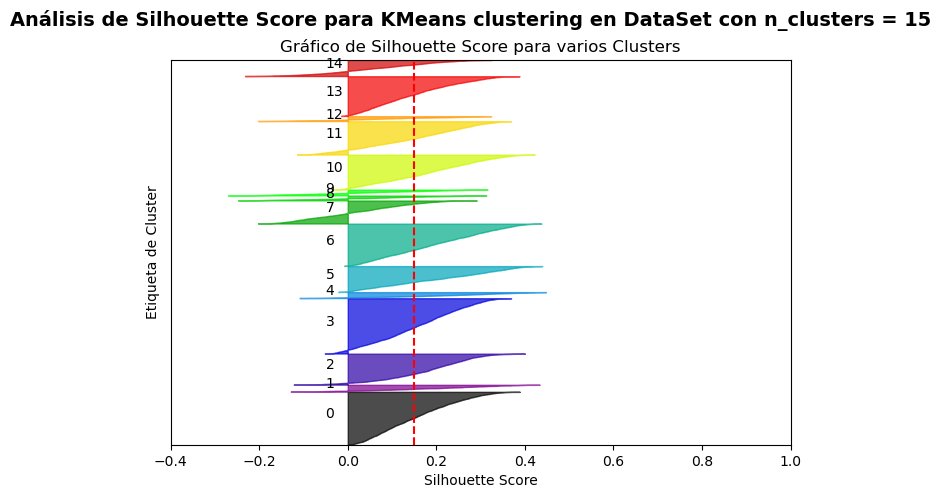

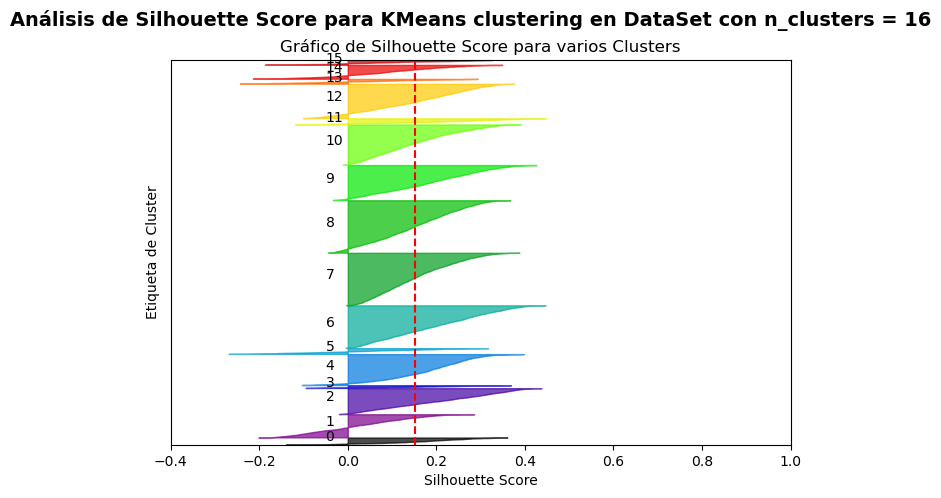

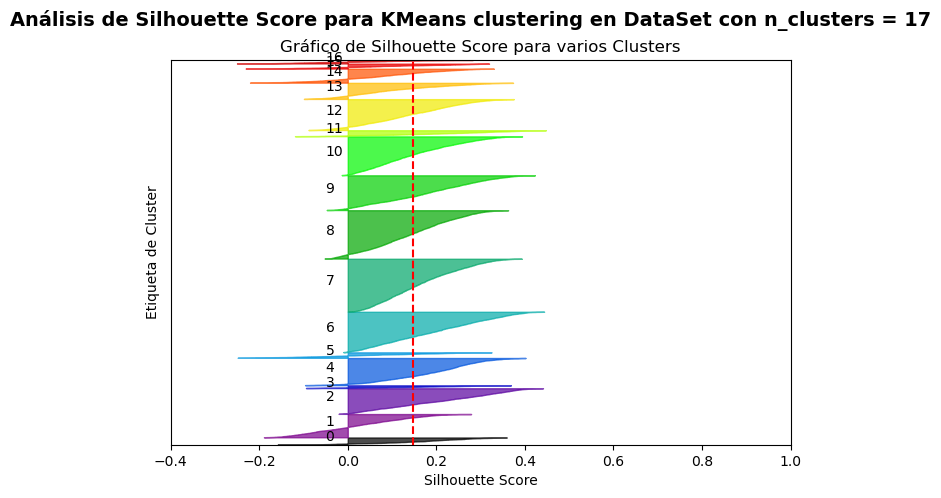

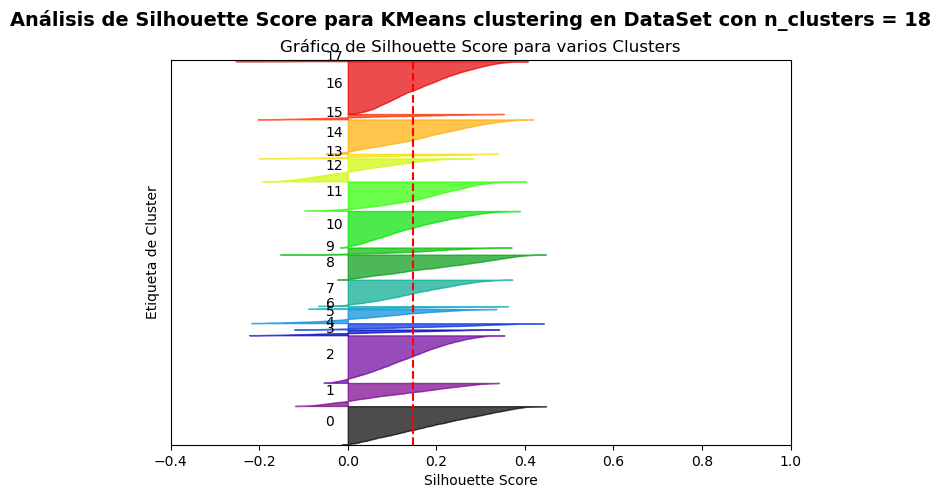

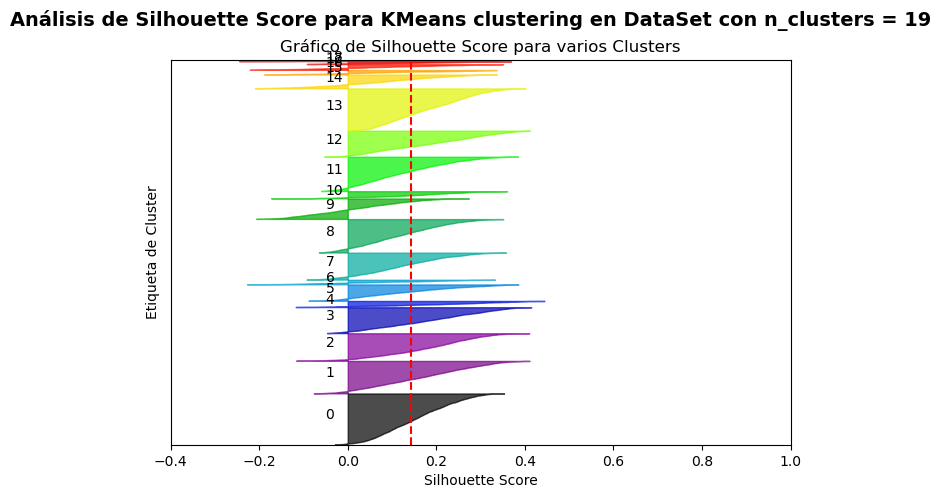

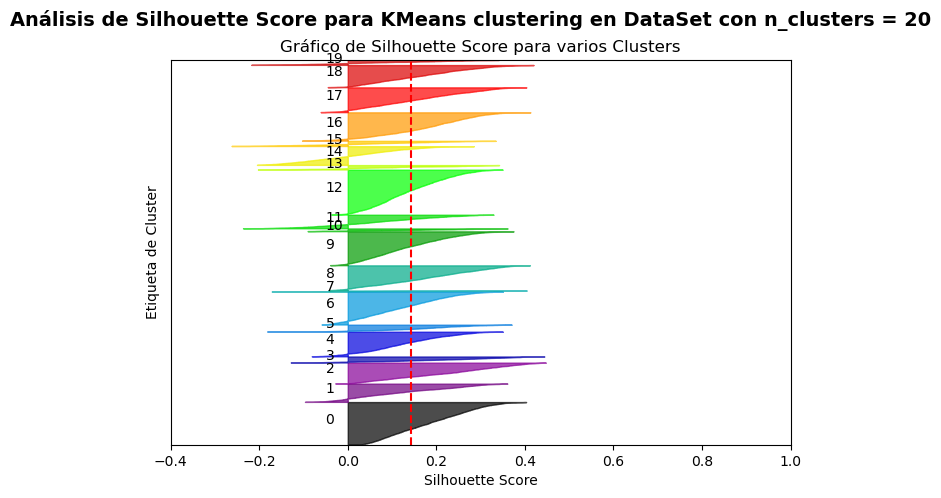

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                    13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots(figsize=(8, 5))

    # El silhouette coefficient tiene un rango desde [-1, 1]
    ax.set_xlim([-0.4, 1]) # inicialmente se simuló a -1, 1 pero los valores
    # obtenidos, son por sobre -0.4

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=218)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print(
        "Para n_clusters =",
        n_clusters,
        " - El promedio silhouette_score es :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("Gráfico de Silhouette Score para varios Clusters")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Etiqueta de Cluster")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Análisis de Silhouette Score para KMeans clustering en DataSet con n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Efectuado el cálculo del _Silhoutte Score_ en función de cada número de clúster, se puede determinar que **el mejor valor se obtuvo con un k = 2**. Esto representa la capacidad para distinguir (separación), entre cluster y su medida se encuentra entre [-1 , 1].

### B. K-Means con valor de k encontrado ( _k=2_ ).

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kfit = kmeans.fit(X_std)
#the centroids
print(kfit.cluster_centers_,'\n')
#the labels
identified_clusters = kfit.predict(X_std)
print(identified_clusters)

[[ 0.81482656  0.69073713  0.93529887 -0.89527725 -0.85863278 -0.22390333
   0.16376379  0.01897128 -0.30435394  0.61324632]
 [-0.5565566  -0.47179895 -0.63884364  0.6115074   0.58647787  0.15293423
  -0.11185671 -0.01295809  0.20788497 -0.41886987]] 

[1 1 0 ... 0 0 0]


De lo obtenido anteriormente, lo más importante son las etiquetas (labels) propuestos por el modelo, en este caso clasificados en 0 y 1.

### C. Visualización usando Principal Component Analysis (PCA).

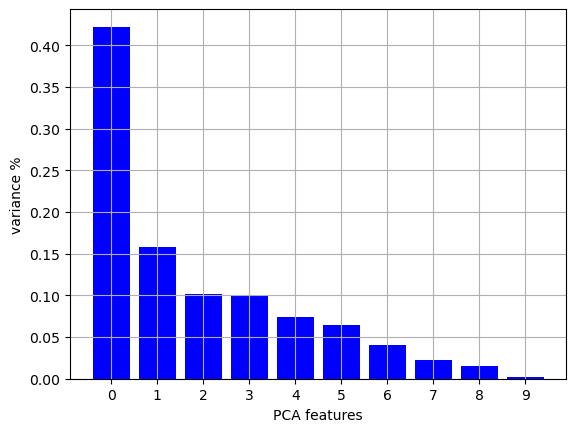

In [11]:
from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA()
principalComponents = pca.fit_transform(X_std)

# Plot the percentage of the variance that is explained by each component
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.grid()
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save the components in a dataframe
PCA_components = pd.DataFrame(principalComponents)

De los PCA obtenidos (variables ortogonales entre sí), el PCA 1 (~ 45%) y PCA 2 (~ 16%), representan ~ el 61% de las variables independientes y su influencia en la independiente (output).

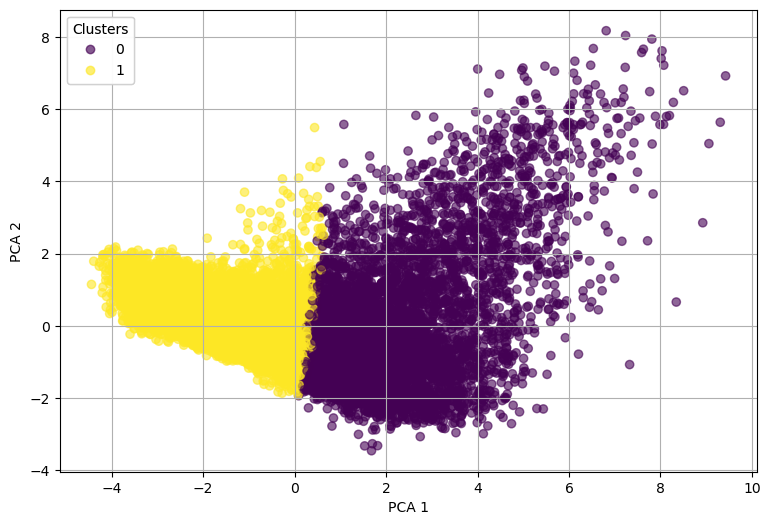

In [12]:
fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.6, 
            c=identified_clusters, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

En análisis del gráfico anterior, demuestra que el eje x logra distinguir entre ambas clases.

Utilizamos labels de los cluster identificados, para caracterizar cada variable en un nuevo feature `Cluster_Id`.

In [13]:
data_clustered= X.copy()
data_clustered['Cluster_Id'] = identified_clusters
data_clustered.head(10)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


## __Pregunta 2__: 
Considere mean-shift clustering con el valor predeterminado del ancho de banda, almacene las etiquetas de clustering resultantes. Luego explore diferentes valores de ancho de banda, al menos cuatro (recuerde almacenar las etiquetas de cluster resultantes para cada caso). Utilice Davies-Bouldin Score para concluir qué ancho de banda obtuvo el mejor resultado de clustering. (__1.5 pts.__)

### A. Uso de Mean Shift.
Para el uso de este método de clustering, se considerarán los valores por default de **Bandwidth**.

In [14]:
from sklearn.cluster import MeanShift

ms = MeanShift()
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[-4.11802366e-01 -3.48521495e-01 -3.41699104e-01  1.89175040e-01
   1.60141829e-01  1.67071237e-01 -1.05624973e-03 -7.41343838e-03
  -6.26170555e-02 -2.37496530e-01]
 [ 4.10326180e+00  2.35208551e+00  8.68641567e-01 -8.56988091e-01
  -7.23655405e-01  6.46566387e+00 -4.18931774e+00  2.12858814e+00
   1.12819427e+00 -2.89760343e-01]
 [ 3.64903500e+00  5.59632169e+00  1.62899412e+00 -1.39927149e+00
  -1.40145120e+00 -1.34926093e+00  2.19969359e+00  5.10624806e+00
   1.19850977e+00 -1.57411598e-01]
 [ 2.48270438e+00  5.34806563e+00  3.84023081e+00 -1.86291085e+00
  -1.79327841e+00  1.34090281e+00 -1.05267514e+00  4.12390065e+00
   6.85071603e-01 -1.61858283e-01]
 [ 4.90056843e+00  5.33715019e+00  1.48667693e+00 -1.34882834e+00
  -1.26060800e+00  6.26068729e+00 -2.77582396e+00  4.76483210e+00
   1.43790003e+00 -7.81343930e-01]
 [ 1.78886481e+00  3.48305012e+00  1.11040697e+00 -1.19287266e+00
  -1.23825665e+00  3.02849189e+00 -2.27106199e+00 -3.55118027e+00
   3.56440131e-01 -8.74878119e-01

In [15]:
#cluster labels
ms_bw_df = ms.labels_
print(ms_bw_df)

[ 0  0 30 ...  0  5 14]


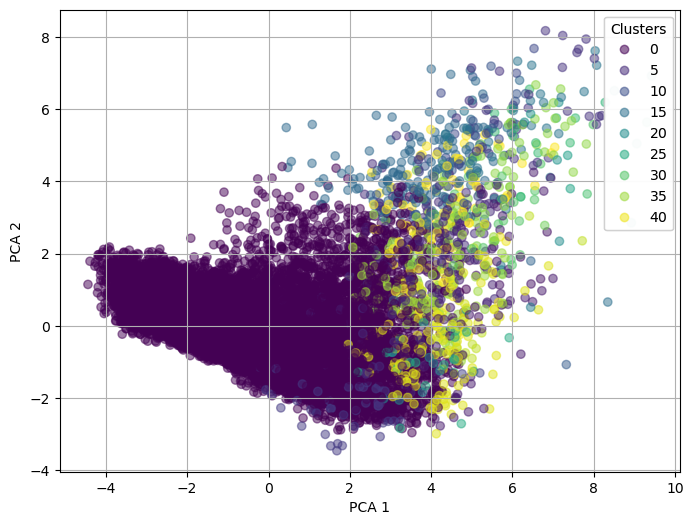

In [16]:
#PCA visualization

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms.labels_, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

El análisis de las condiciones _default_, demuestra que los parámetros de **Bandwidth** generan una gran cantidad de cluster que no son los adecuados si los comparamos con las condiciones reales.

### B. Determinación del Bandwith (4 diferentes):
Se decidió ajuster valores de bandwidth de manera de generar el mayor parecido con la cantidad de cluster obtenidos en el punto 1.

#### B.1. Ancho de Banda (Bandwidth) = 6

In [17]:
from sklearn.cluster import MeanShift
from sklearn.metrics import davies_bouldin_score

ms = MeanShift(bandwidth=6)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# Almacenamos las etiquetas
ms_bw_6 = ms.labels_
print(ms_bw_6)

[[-1.42429249e-01 -1.58194466e-01 -8.84470362e-02  6.19760548e-02
   5.86717775e-02  6.96731016e-02  6.76977772e-02 -1.81546873e-03
  -4.26472420e-02 -3.68164170e-02]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [18]:
db_s_6 = davies_bouldin_score(X_std, ms_bw_6)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : {db_s_6}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : 1.1298803050972668


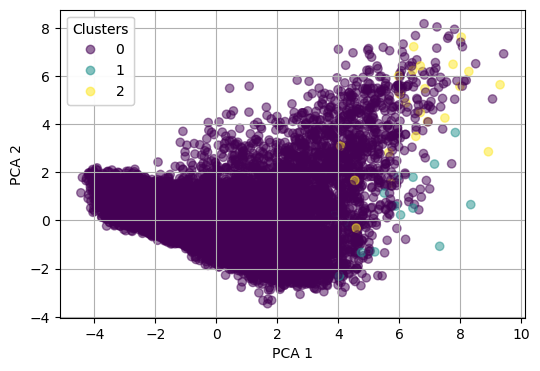

In [19]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_6, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

El análisis de los cluster obtenidos, demuestra que el ancho de banda no permite distinguir la separación entre puntos.

#### B.2. Ancho de Banda (Bandwidth) = 5.5

In [20]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth = 5.5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)

# Almacenamos las etiquetas
ms_bw_55 = ms.labels_
print(ms_bw_55)

[[-1.73165600e-01 -1.88132871e-01 -1.10303084e-01  7.88624048e-02
   7.44435390e-02  8.42046456e-02  7.32644678e-02 -6.15642441e-03
  -4.76744044e-02 -4.87588579e-02]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [21]:
db_s_55 = davies_bouldin_score(X_std, ms_bw_55)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : {db_s_55}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : 1.1298803050972668


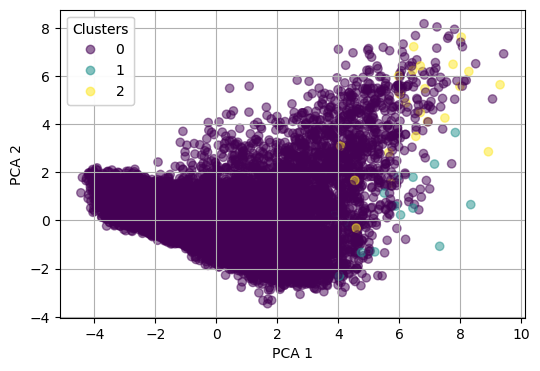

In [22]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_55, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

El análisis de los cluster obtenidos, demuestra que el ancho de banda no permite distinguir la separación entre puntos.

#### B.3. Ancho de Banda (Bandwidth) = 5

In [23]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)
ms_bw_5 = ms.labels_
print(ms_bw_5)

[[-2.00115810e-01 -2.12541984e-01 -1.33959044e-01  9.46933123e-02
   8.88226226e-02  9.70374500e-02  7.69089891e-02 -5.73245974e-03
  -4.88606350e-02 -6.49551965e-02]
 [ 4.83410200e+00  8.93399867e+00  1.62125555e+00 -1.56517514e+00
  -1.45810520e+00  5.30678649e+00  1.72983079e+00 -4.66382375e+00
   9.72957409e-01 -8.94178513e-01]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]]
[0 0 1 ... 0 0 0]


In [24]:
db_s_5 = davies_bouldin_score(X_std, ms_bw_5)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : {db_s_5}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : 1.241840588470654


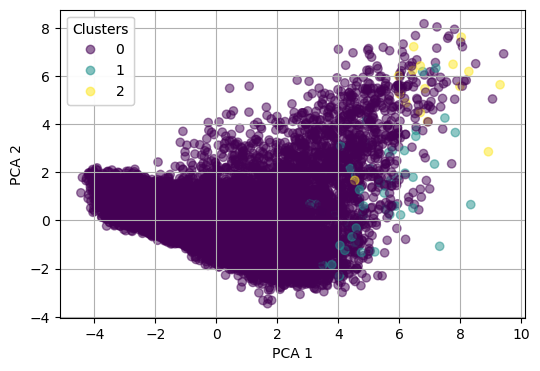

In [25]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_5, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

El análisis de los cluster obtenidos, demuestra que el ancho de banda no permite distinguir la separación entre puntos.

#### B.4. Ancho de Banda (Bandwidth) = 4.5

In [26]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=4.5)
ms.fit(X_std)
cluster_centers = ms.cluster_centers_
print(cluster_centers)
ms_bw_45 = ms.labels_
print(ms_bw_45)

[[-2.41014321e-01 -2.46914445e-01 -1.74591512e-01  1.21061667e-01
   1.11933728e-01  1.12989852e-01  7.01052975e-02 -5.97642821e-03
  -4.92576505e-02 -9.21346679e-02]
 [ 4.91404064e+00  6.28450903e+00  1.59082019e+00 -1.40526267e+00
  -1.28647342e+00  6.13252010e+00 -2.28335154e+00  4.86130273e+00
   1.49181511e+00 -4.87988712e-01]
 [ 5.08509376e+00  1.17885237e+01  1.71224423e+00 -1.72599931e+00
  -1.55560955e+00  4.88355223e+00  1.68793077e+00 -4.46092382e+00
   1.25523946e-01 -1.29205080e+00]
 [ 4.42604550e+00  1.12211007e+01  4.40127733e+00 -1.91472155e+00
  -1.82934565e+00  3.42387025e+00 -2.21680501e+00 -9.89799302e+00
   1.91627856e+00 -4.16651953e-01]
 [ 4.00480083e+00  4.83459573e+00  2.30663312e+00 -1.87643009e+00
  -1.68003505e+00  9.78933005e+00 -5.38775162e+00 -4.70643093e+00
   3.85293592e-01 -1.38315124e-02]
 [ 3.97836785e+00  9.17726716e+00  5.28640681e+00 -1.90159305e+00
  -1.93974500e+00 -4.49199689e+00 -1.15501092e+00 -5.81767214e+00
   2.19706308e+00 -1.35297560e+00

In [27]:
db_s_45 = davies_bouldin_score(X_std, ms_bw_45)
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : {db_s_45}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : 1.1230325819003544


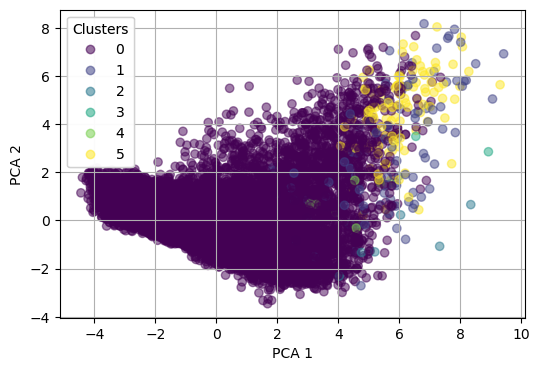

In [28]:
#PCA visualization

fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=ms_bw_45, cmap='viridis')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

El análisis de los cluster obtenidos, demuestra que el ancho de banda no permite distinguir la separación entre puntos.

### C. Davies-Bouldin Score, para elección Ancho de Banda:

Considerando que ninguno de los valores ajustado de bandwidth fue el adecuado para generar una adecuada separación de los cluster, se implementó el score Davies-Bouldin objeto determinar el mejor ancho de banda ajustado.

In [29]:
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : {db_s_6}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : {db_s_55}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : {db_s_5}')
print(f'Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : {db_s_45}')

Davies-Bouldin Score(using mean shift) - Bandwidth = 6 : 1.1298803050972668
Davies-Bouldin Score(using mean shift) - Bandwidth = 5.5 : 1.1298803050972668
Davies-Bouldin Score(using mean shift) - Bandwidth = 5 : 1.241840588470654
Davies-Bouldin Score(using mean shift) - Bandwidth = 4.5 : 1.1230325819003544


De los valores obtenidos en la métrica, **D-B** se puede señalar que el Bandwidth adecuado es igual a 5.

## __Pregunta 3__: 
Usa cualquiera de los algoritmos de clustering que vimos en clases. Genere dos clusters a partir del conjunto de datos (sin la variable de clase). Calcule el Adjusted Rand index utilizando las etiquetas del cluster resultantes y la variable de clase del conjunto de datos original. Según el valor del índice, ¿hay alguna correspondencia entre el resultado del clustering y la variable de clase? Comenta tu respuesta. (__1.5 pts.__)

### A. Selección de DBSCAN para generar 2 clúster:

Se decidió implementar el Density-Based Spatial Clustering of Applications with Noise, para ello y como regla lo especificado en [DBSCAN Parameter Estimation Using Python](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd), donde se determina que una adecuada medida de MinPoints (**Minimum Samples (“MinPts”)**) será equivalente a la cantidad de variables ingresadas. 
En este MinSamples (n_neighbors = 10), objeto determinar el epsilon con la regla del codo.

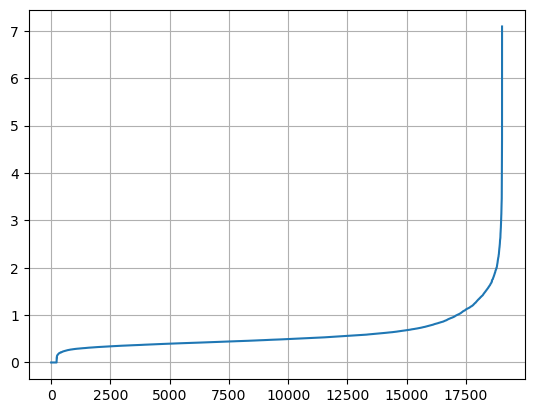

In [12]:
import numpy as np

from sklearn.neighbors import NearestNeighbors

#Se considera MinPts = 10
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)

El análisis de la regla del codo, con los valores determinados, permite observar que el epsilon es equivalente 2.1

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.1, min_samples=10)
db.fit(X_std)
print(db.labels_)
# los que presente -1, son los noise points

[ 0  0 -1 ...  0  0  0]


Las etiquetas -1 corresponden a Noisy Points.

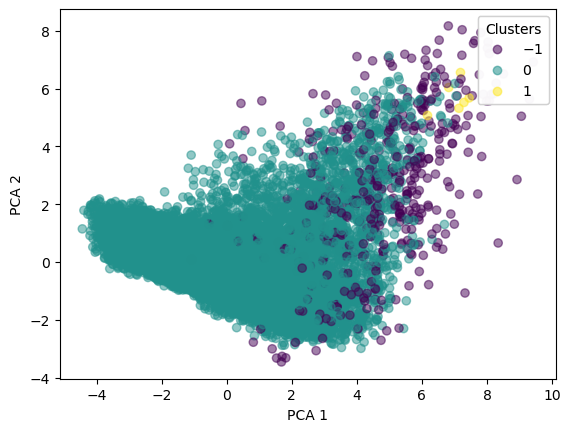

In [26]:
#PCA visualization

fig, ax = plt.subplots()
scatter = ax.scatter(PCA_components[0], PCA_components[1], alpha=.5, 
            c=db.labels_)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#los -1 corresponden a noise points

Se puede distinguir los cluster **0 y 1**, y el cluster **-1** que corresponden a la noise points.

Creamos una nueva variable de manera de almacenar las etiquetas obtenidas en el modelo DBSCAN, como variable `Cluster_Id_DBSCAN`.

In [30]:
data_clustered_dbscan= X.copy()
data_clustered_dbscan['Cluster_Id_DBSCAN'] = db.labels_
data_clustered_dbscan.head(10)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id_DBSCAN
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,-1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,0
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,0


Se efectúa un _Silhoutte Score_ objeto determinar si los cluster obtenidos (etiquetas) son distinguibles entre sí.

In [28]:
print(f'Silhouette Score(using dbscan): {silhouette_score(X_std, db.labels_)}')

Silhouette Score(using dbscan): 0.5569300821730305


### B. Aplicación del Rand-Index:
Esta métrica permite determinar las similaridades entre dos conjuntos de datos, por lo cual, se debe comparar las variables y = `class` y las etiquetas obtenidas en el modelo en la variable `Cluster_Id_DBSCAN`, permitiendo determinar un **accuracy** del modelo.

In [89]:
import numpy as np
#encode the output
y=np.where(telescope_data["class"]=="h",0,1)

In [90]:
print(y)

[1 1 1 ... 0 0 0]


In [91]:
from sklearn import metrics
metrics.adjusted_rand_score(y,db.labels_)

0.02691871641705783

Si consideramos que el valor del rand index tiene un rango de [0 - 1], el valor obtenido del modelo 0.027 es deficiente.

## __Pregunta 4__: 
Basado en el valor k* encontrado en la pregunta 1, caracterice cada grupo considerando algunos de los atributos (al menos tres que encuentre sean relevantes para esta aplicación). (__1.5 pts.__)

### A. Caracterización de grupos con etiquetas obtenidas en KMeans (pregunta 1):

In [14]:
data_clustered

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [15]:
y=telescope_data.iloc[:,10]
y

0        g
1        g
2        g
3        g
4        g
        ..
19015    h
19016    h
19017    h
19018    h
19019    h
Name: class, Length: 19020, dtype: object

Se debe generar un nuevo conjunto de datos obtenido objeto carcaterizar cada grupo.

In [24]:
data_clustered= data_clustered.copy()
data_clustered['Class'] = np.where(telescope_data["class"]=="h",0,1)
data_clustered.head(10)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1,1


Se efectuó un encoding de la variable `class`, a datos numéricos, objeto sea incluída en una matriz de correlación.

### B. Determinación de variables:
Se utiliza un mapa de correlación, objeto determinar las variables más incidentes en el output.

In [22]:
def plotting_heatmap(data_clustered):
    correlation=data_clustered.corr()
    figure(figsize=(16,8))
        
        
    sns.heatmap(correlation, annot=True)
    plt.show()

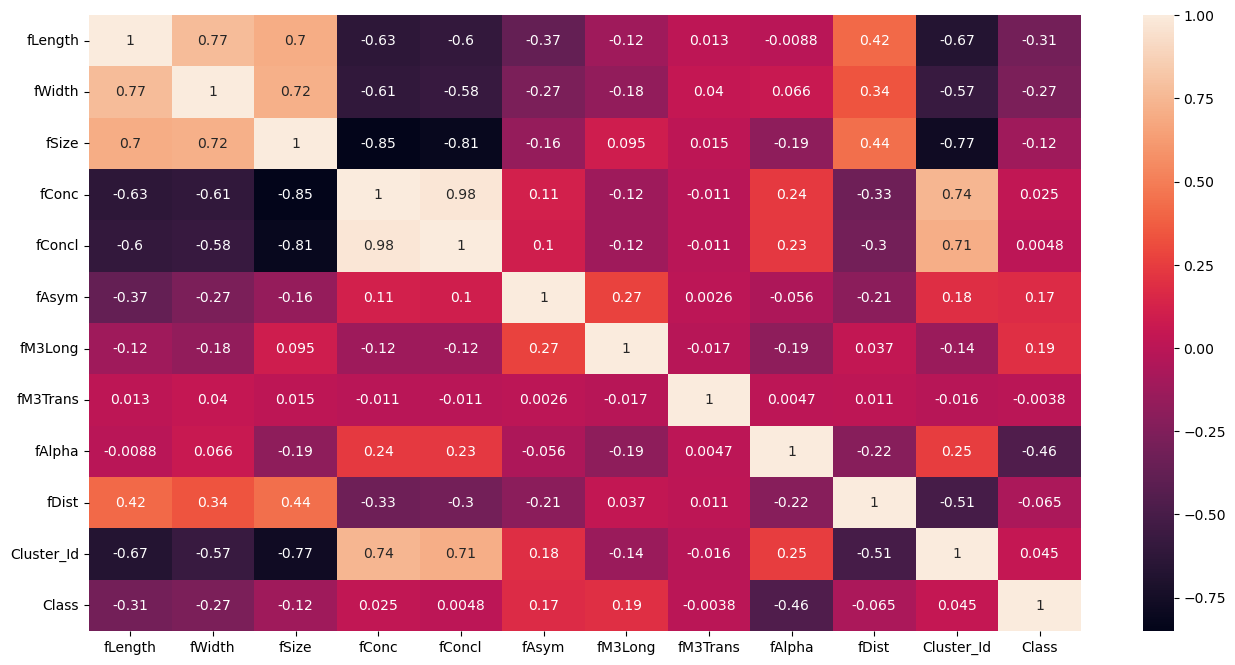

In [23]:
plotting_heatmap(data_clustered)

Del análisis de la matriz de correlación anterior, se pueden obtener las dos variables están mayormente correlacionadas a la variable `class`, por lo cual, serán análizadas las variables `fLenght`(**Major axis of ellipse**) y `fAlpha` (**Angle of major axis with vector to origin**).

Previo, a esto, se vuelve a generar la variable `class`, con datos categóricos.

In [26]:
data_clustered= data_clustered.copy()
data_clustered['Class'] = y
data_clustered.head(10)

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Cluster_Id,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,0,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,0,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,0,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1,g


#### B.1. Variable Class:

In [27]:
print("For Cluster 0")
print(data_clustered[data_clustered['Cluster_Id']==0].Class.value_counts(),'\n')

print("For Cluster 1")
print(data_clustered[data_clustered['Cluster_Id']==1].Class.value_counts(),'\n')

For Cluster 0
g    4812
h    2922
Name: Class, dtype: int64 

For Cluster 1
g    7520
h    3766
Name: Class, dtype: int64 



Un análisis preliminar de lo que muestra la clusterización de ambas variables, es que el cluster 0 tiene una tendencia a obtener la misma cantidad de variables clasificadas como g al conjunto de datos originales de la variable `class`. 

#### B.2. Variable `fLenght` (Major axis of ellipse):

For cluster 0

count    7734.000000
mean       87.689745
std        45.544797
min        25.436400
25%        56.020600
50%        77.356100
75%       103.407000
max       334.177000
Name: fLength, dtype: float64 



<AxesSubplot:title={'center':'Major axis of ellipse in Cluster 0 (Histogram)'}, ylabel='Frequency'>

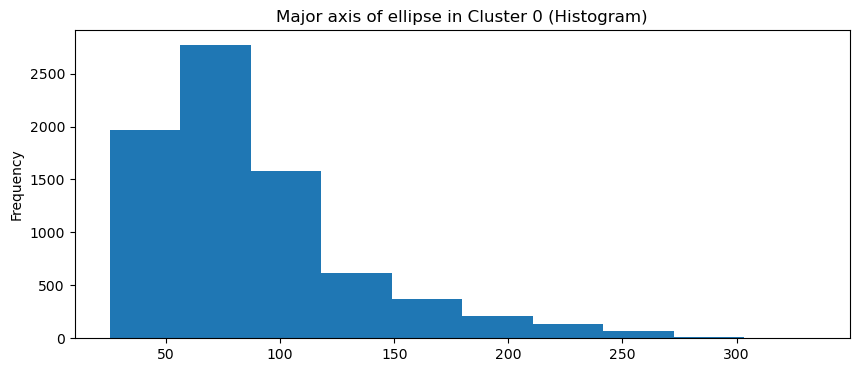

In [28]:
print('For cluster 0\n')

print(data_clustered[data_clustered['Cluster_Id']==0].fLength.describe(),'\n')

data_clustered[data_clustered['Cluster_Id']==0].fLength.plot(figsize=(10, 4), 
                                                                            title='Major axis of ellipse in Cluster 0 (Histogram)', kind='hist')

For cluster 1

count    11286.000000
mean        29.649605
std         15.280072
min          4.283500
25%         20.712750
50%         26.277000
75%         33.930950
max        229.817000
Name: fLength, dtype: float64 



<AxesSubplot:title={'center':'Major axis of ellipse in Cluster 1 (Histogram)'}, ylabel='Frequency'>

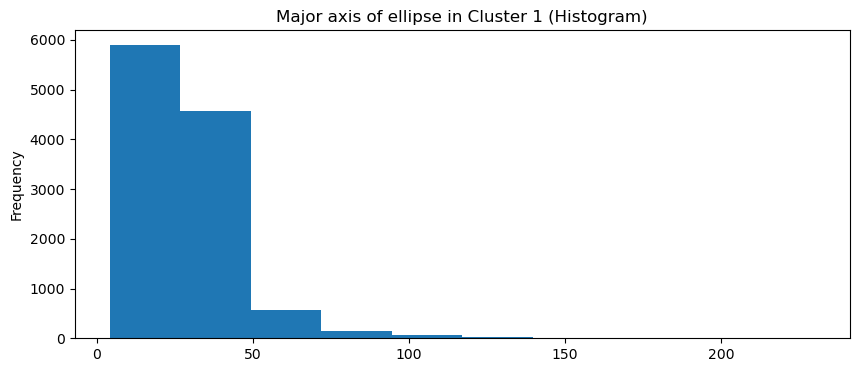

In [29]:
print('For cluster 1\n')

print(data_clustered[data_clustered['Cluster_Id']==1].fLength.describe(),'\n')

data_clustered[data_clustered['Cluster_Id']==1].fLength.plot(figsize=(10, 4), 
                                                                            title='Major axis of ellipse in Cluster 1 (Histogram)', kind='hist')

Text(0.5, 1.0, '')

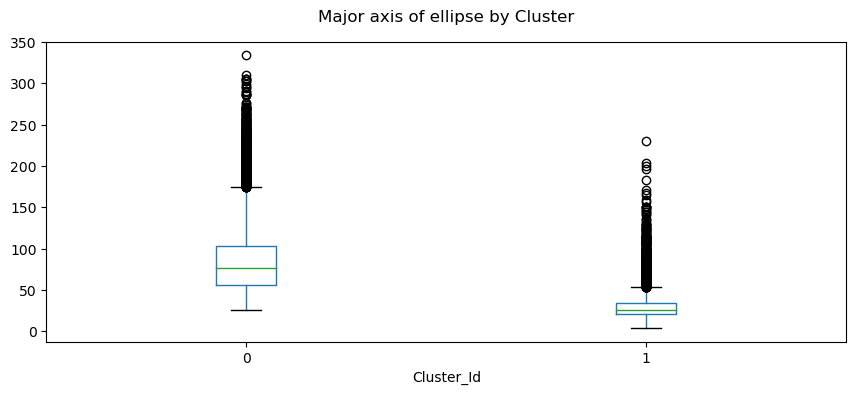

In [31]:
bp=data_clustered.boxplot(column='fLength', by='Cluster_Id',figsize=(10, 4),grid=False)
bp.get_figure().suptitle('Major axis of ellipse by Cluster')
bp.get_figure().gca().set_title("")

De los gráficos presentados, el más relevante es el boxplot que demuestra la gran cantidad de outliers presentes en esta variable como influencia para ambos cluster. En particular, el cluster cero presenta mayor cantidad de outliers que el cluster 1.

#### B.3. Variable `fAlpha` (Angle of major axis with vector to origin):

For cluster 0

count    7734.000000
mean       19.700606
std        24.058172
min         0.001000
25%         2.929025
50%         7.964500
75%        29.057650
max        89.979800
Name: fAlpha, dtype: float64 



<AxesSubplot:title={'center':'Angle of major axis with vector to origin in Cluster 0 (Histogram)'}, ylabel='Frequency'>

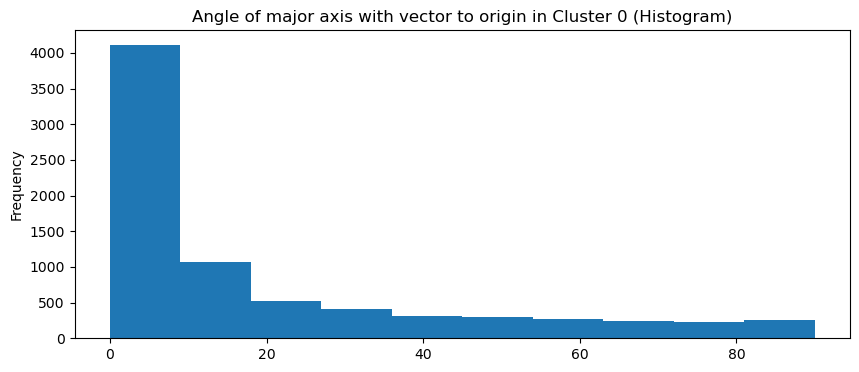

In [32]:
print('For cluster 0\n')

print(data_clustered[data_clustered['Cluster_Id']==0].fAlpha.describe(),'\n')

data_clustered[data_clustered['Cluster_Id']==0].fAlpha.plot(figsize=(10, 4), 
                                                                            title='Angle of major axis with vector to origin in Cluster 0 (Histogram)', kind='hist')

For cluster 1

count    11286.000000
mean        29.649605
std         15.280072
min          4.283500
25%         20.712750
50%         26.277000
75%         33.930950
max        229.817000
Name: fLength, dtype: float64 



<AxesSubplot:title={'center':'Angle of major axis with vector to origin in Cluster 1 (Histogram)'}, ylabel='Frequency'>

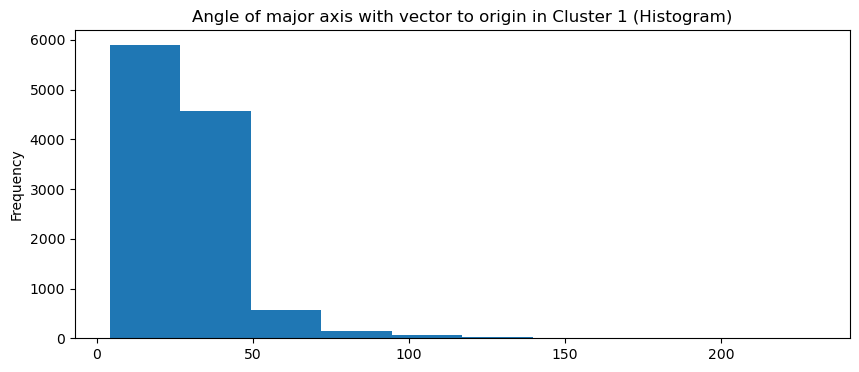

In [33]:
print('For cluster 1\n')

print(data_clustered[data_clustered['Cluster_Id']==1].fLength.describe(),'\n')

data_clustered[data_clustered['Cluster_Id']==1].fLength.plot(figsize=(10, 4), 
                                                                            title='Angle of major axis with vector to origin in Cluster 1 (Histogram)', kind='hist')

Text(0.5, 1.0, '')

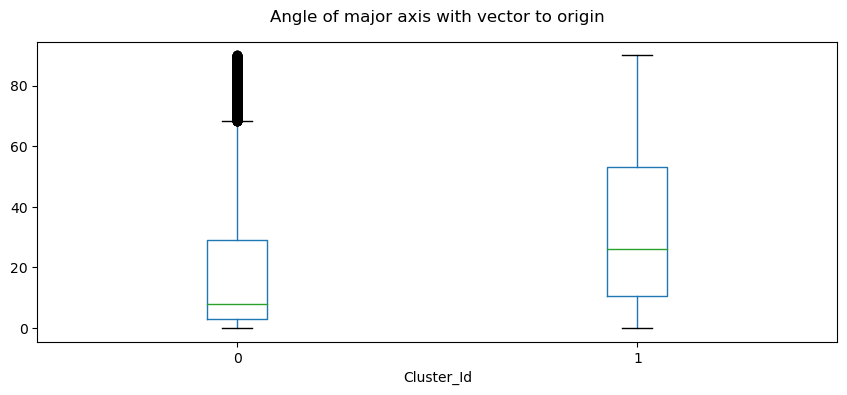

In [34]:
bp=data_clustered.boxplot(column='fAlpha', by='Cluster_Id',figsize=(10, 4),grid=False)
bp.get_figure().suptitle('Angle of major axis with vector to origin')
bp.get_figure().gca().set_title("")

En este caso, el análisis del boxplot de esta variable `fAlpha` y su influencia en los cluster 0 y 1 presentan menor presencia de outliers, en particular la variable 1, tiene una buena distribución.

## Conclusiones:

Al aplicar esta serie de algoritmos de clustering basado en aprendizaje no supervisado, se puede concluir que necesariamente se deben aplicar la mayor cantidad de métodos posible de manera de que estos ayudan a identificar (dintinguir), de manera manera las variables en cuestión.

En el caso particular de este problema, como condición inicial sabíamos que sólo existían dos clases pero los distintos algoritmos que se fueron ejecutando planteaban una mayor cantidad bajo valores óptimos, lo que no coincidía con la realidad.

Es necesario siempre emplear técnicas previas/posteriores de EDA, con el objeto de eliminar variables que produzcan ruido e identificar de igual manera outliers que generen el mismo efecto en el resultado del modelo.